In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from information_estimation import *
from image_utils import *

from led_array.bsccm_utils import *
from bsccm import BSCCM
from jax import jit
import numpy as onp
import jax.numpy as np

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

Opening BSCCM
Opened BSCCM


In [2]:
channel_names = ['Brightfield', 'DPC_Right', 'LED119' ]
edge_crop = 32
num_images = 5000
num_patches = 5000
photons_per_pixel = 300
num_bootstrap_samples = 10
confidence_interval = 99
patch_size = 10

mi_means = []
mi_confidences = []
h_y_given_x_means = []
h_y_given_x_confidences = []
for channel_name in tqdm(channel_names):
    images = load_bsccm_images(bsccm, channel_name, num_images=num_images, edge_crop=edge_crop, convert_units_to_photons=True, median_filter=True, verbose=False)
    patches = extract_patches(images, patch_size=patch_size, num_patches=num_patches, verbose=False)
    patches = patches * photons_per_pixel / np.mean(images)
    noisy_patches = add_noise(patches)

    mi_mean, mi_confidence = run_bootstrap(noisy_patches, num_bootstrap_samples=num_bootstrap_samples, confidence_interval=confidence_interval, 
                estimation_fn=lambda noisy_images: estimate_mutual_information(noisy_images=noisy_images, verbose=True))
    
    h_y_given_x_mean, h_y_given_x_confidence = run_bootstrap(noisy_patches, num_bootstrap_samples=num_bootstrap_samples, confidence_interval=confidence_interval,
                estimation_fn=lambda noisy_images: compute_conditional_entropy(patches))

    mi_means.append(mi_mean)
    mi_confidences.append(mi_confidence)
    h_y_given_x_means.append(h_y_given_x_mean)
    h_y_given_x_confidences.append(h_y_given_x_confidence)
    
mi_means = np.array(mi_means)
mi_confidences = np.array(mi_confidences)
h_y_given_x_means = np.array(h_y_given_x_means)
h_y_given_x_confidences = np.array(h_y_given_x_confidences)

  0%|          | 0/3 [00:00<?, ?it/s]

building toeplitz mat: 100%|██████████| 19/19 [00:00<00:00, 32.39it/s]


Estimated H(Y|X) = 6.151 bits/pixel
Estimated H(Y) = 6.231 bits/pixel
Estimated I(Y;X) = 0.079 bits/pixel
Estimated H(Y|X) = 6.152 bits/pixel
Estimated H(Y) = 6.231 bits/pixel
Estimated I(Y;X) = 0.079 bits/pixel
Estimated H(Y|X) = 6.153 bits/pixel
Estimated H(Y) = 6.232 bits/pixel
Estimated I(Y;X) = 0.079 bits/pixel
Estimated H(Y|X) = 6.152 bits/pixel
Estimated H(Y) = 6.232 bits/pixel
Estimated I(Y;X) = 0.080 bits/pixel
Estimated H(Y|X) = 6.153 bits/pixel
Estimated H(Y) = 6.230 bits/pixel
Estimated I(Y;X) = 0.077 bits/pixel
Estimated H(Y|X) = 6.153 bits/pixel
Estimated H(Y) = 6.226 bits/pixel
Estimated I(Y;X) = 0.073 bits/pixel
Estimated H(Y|X) = 6.153 bits/pixel
Estimated H(Y) = 6.230 bits/pixel
Estimated I(Y;X) = 0.077 bits/pixel
Estimated H(Y|X) = 6.153 bits/pixel
Estimated H(Y) = 6.231 bits/pixel
Estimated I(Y;X) = 0.078 bits/pixel
Estimated H(Y|X) = 6.152 bits/pixel
Estimated H(Y) = 6.231 bits/pixel
Estimated I(Y;X) = 0.079 bits/pixel
Estimated H(Y|X) = 6.153 bits/pixel
Estimated 

 33%|███▎      | 1/3 [00:56<01:52, 56.28s/it]

Estimated H(Y|X) = 6.139 bits/pixel
Estimated H(Y) = 6.465 bits/pixel
Estimated I(Y;X) = 0.326 bits/pixel
Estimated H(Y|X) = 6.141 bits/pixel
Estimated H(Y) = 6.471 bits/pixel
Estimated I(Y;X) = 0.330 bits/pixel
Estimated H(Y|X) = 6.138 bits/pixel
Estimated H(Y) = 6.479 bits/pixel
Estimated I(Y;X) = 0.341 bits/pixel
Estimated H(Y|X) = 6.139 bits/pixel
Estimated H(Y) = 6.465 bits/pixel
Estimated I(Y;X) = 0.326 bits/pixel
Estimated H(Y|X) = 6.139 bits/pixel
Estimated H(Y) = 6.473 bits/pixel
Estimated I(Y;X) = 0.335 bits/pixel
Estimated H(Y|X) = 6.139 bits/pixel
Estimated H(Y) = 6.466 bits/pixel
Estimated I(Y;X) = 0.327 bits/pixel
Estimated H(Y|X) = 6.142 bits/pixel
Estimated H(Y) = 6.477 bits/pixel
Estimated I(Y;X) = 0.335 bits/pixel
Estimated H(Y|X) = 6.139 bits/pixel
Estimated H(Y) = 6.467 bits/pixel
Estimated I(Y;X) = 0.328 bits/pixel


 67%|██████▋   | 2/3 [01:51<00:55, 55.66s/it]

Estimated H(Y|X) = 6.140 bits/pixel
Estimated H(Y) = 6.474 bits/pixel
Estimated I(Y;X) = 0.335 bits/pixel
Estimated H(Y|X) = 6.140 bits/pixel
Estimated H(Y) = 6.468 bits/pixel
Estimated I(Y;X) = 0.328 bits/pixel
Estimated H(Y|X) = 6.104 bits/pixel
Estimated H(Y) = 6.778 bits/pixel
Estimated I(Y;X) = 0.674 bits/pixel
Estimated H(Y|X) = 6.102 bits/pixel
Estimated H(Y) = 6.764 bits/pixel
Estimated I(Y;X) = 0.663 bits/pixel
Estimated H(Y|X) = 6.095 bits/pixel
Estimated H(Y) = 6.745 bits/pixel
Estimated I(Y;X) = 0.650 bits/pixel
Estimated H(Y|X) = 6.099 bits/pixel
Estimated H(Y) = 6.761 bits/pixel
Estimated I(Y;X) = 0.662 bits/pixel
Estimated H(Y|X) = 6.100 bits/pixel
Estimated H(Y) = 6.776 bits/pixel
Estimated I(Y;X) = 0.676 bits/pixel
Estimated H(Y|X) = 6.101 bits/pixel
Estimated H(Y) = 6.753 bits/pixel
Estimated I(Y;X) = 0.652 bits/pixel
Estimated H(Y|X) = 6.101 bits/pixel
Estimated H(Y) = 6.751 bits/pixel
Estimated I(Y;X) = 0.650 bits/pixel
Estimated H(Y|X) = 6.103 bits/pixel
Estimated 

100%|██████████| 3/3 [02:49<00:00, 56.58s/it]

Estimated H(Y|X) = 6.100 bits/pixel
Estimated H(Y) = 6.770 bits/pixel
Estimated I(Y;X) = 0.670 bits/pixel
Estimated H(Y|X) = 6.099 bits/pixel
Estimated H(Y) = 6.753 bits/pixel
Estimated I(Y;X) = 0.654 bits/pixel


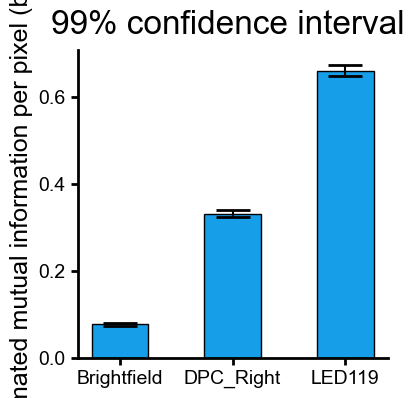

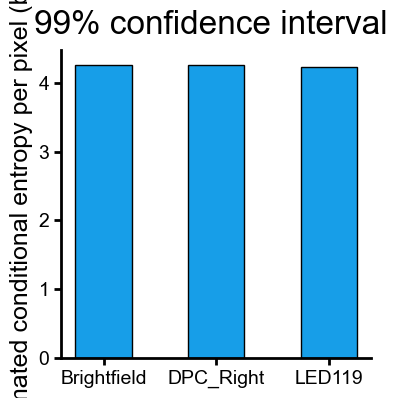

In [15]:
# set the width of the bars
bar_width = 0.35
error_kw = {'capsize': 12, 'capthick': 2}

# create a paired bar plot of results
fig, ax = plt.subplots(1, 1, figsize=(4, 4))


# create the bar plots
bar_width = 0.5
lower_errors = mi_means - mi_confidences[:, 0]
upper_errors = mi_confidences[:, 1] - mi_means

# Calculate the positions where the bars should be placed to be centered on the ticks
positions = np.arange(len(channel_names)) + 0.5 * bar_width

ax.bar(
    positions,
    mi_means,
    yerr=np.array([lower_errors, upper_errors]),
    width=bar_width,
    color=colors[0],
    edgecolor='k',
    linewidth=1,
    error_kw=error_kw
)

# add labels, title, and legend
ax.set_xticks(np.arange(len(channel_names)) + bar_width / 2, channel_names)
ax.set_ylabel('Estimated mutual information per pixel (bits)')
fig.suptitle(f'{confidence_interval}% confidence interval')
clear_spines(ax)

# make another plot for conditional entropy
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

lower_errors = h_y_given_x_means - h_y_given_x_confidences[:, 0]
upper_errors = h_y_given_x_confidences[:, 1] - h_y_given_x_means

ax.bar(
    positions,
    h_y_given_x_means,
    # yerr=np.array([lower_errors, upper_errors]),
    width=bar_width,
    color=colors[0],
    edgecolor='k',
    linewidth=1,
    error_kw=error_kw
)

# add labels, title, and legend
ax.set_xticks(np.arange(len(channel_names)) + bar_width / 2, channel_names)
ax.set_ylabel('Estimated conditional entropy per pixel (bits)')
fig.suptitle(f'{confidence_interval}% confidence interval')
clear_spines(ax)